# Using sympy

In [2]:
import sympy 
from IPython.display import display,HTML,Markdown
phi0,phi1,Delta,Gamma,nu,Xi, delta, alpha, n,i , phi3,phi4,phi2 = sympy.symbols('phi0,phi1,Delta,Gamma,nu,Xi, delta, alpha, n,i , phi3,phi4,phi2')
omegaeq = 1-Gamma-nu*Xi*delta-nu*Xi*(alpha+n)/(1-Delta) # EXPRESSION VERIFIED

#modified alpha
alphaeq=phi0+alpha*(1-phi4)+i*(1-phi3)
lambdaeq=  (1/phi1)*(1-1/alphaeq)**(1/phi2)

Omega0 = sympy.sqrt(lambdaeq*omegaeq*((1-Delta)/(nu*Xi*delta))*phi2*(lambdaeq)**(-phi2-1) )

In [ ]:
for var in [ alpha, n, delta, nu, Gamma, Xi, Delta, i, phi3,phi4,phi0,phi1,phi2]:
    display(var)#print(var)
    display(sympy.diff(Omega0,var))
    print('$',sympy.latex(sympy.diff(Omega0,var)),'$')

# Preparing relaxation dynamics

In [4]:
def InitialCond_Relax(hub,relaxedvar,statevar,preset={},stepsConv=10): 
    '''
    Find new initial condition for relaxed variables so that they begin at a steady rate. 
    If lagX (differential variable) is the lag version of X (state variable),
    it finds lagX(t=0) so that $lagX(t=0)=X(t=0)$

    NOT IMPLEMENTED NOW 
    '''

    from scipy.optimize import fsolve
    def ecart(relaxedvar,statevar):
        hub.set_dparam(**preset)
        dparr=hub.get_dparam()
        return  np.sum([ (dparr[relaxedvar[i]]['value'][0,0,0,0,0] - 
                          dparr[statevar[i]  ]['value'][0,0,0,0,0]   )**2   
                          for i in range(len(relaxedvar)) ])  
                                         
    # load the preset 
    # get dparam values 


def InitialCond_Relax_far(hub,preset={},stepsP=10,stepsConv=10): 
    '''
    Iterative method to go from one preset to the other, if the equilibrium is tought to find.
    Start at the initial parameters/conditions
    Then generate intermediary preset that mix original state, and the final state, 
    find the right initial condition, then go on the next one. 
    '''
    pass

In [7]:
!pytest chimes/tests/test_00_BASIC.py -v

============================= test session starts =============================
platform win32 -- Python 3.11.0, pytest-7.4.0, pluggy-1.2.0 -- C:\ProgramData\Anaconda3\envs\py3.11\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\Paul Valcke\Documents\GitHub\CHIMES
plugins: anyio-3.6.2, dash-2.8.1
collecting ... collected 0 items

============================ no tests ran in 0.00s ============================


ERROR: file or directory not found: chimes/tests/test_00_BASIC.py



# Distribution of wage and inequalities for a power-law framework 

We assume $k$ hierarchical firms: the top layer of index 0 has one person, and the layer under corresponds to its direct subordinates. Each person of one layer has $a$ subordinates. 
The higher the hierarchical layer, the higher the wage: every layer correspond to a wage multiplication $x$.

The society will have M layers : 
$$N=k \sum_{i=0}^M a^i$$ 

In consequence : 
* $N= k\sum_i a^i$  Total population
* $W_i = w_i N_i$   Total wage of the layer 
* $W = \sum_i w_i N_i$ 
* $w_{i+1} = w_i x$ 
* $N_{i+1} = N_i a$

What we want to determine : 
* What is the relationship between the mean and median wage ? 
* What is the standard deviation ? 
* What is the gini coefficient ? 

## Capital total output

$\text{Output}_{total}= \int_0^{\infty} K e^{-\delta t} u \nu^{-1} dt$. If everything remain constant, $\text{Output}_{total}= K\dfrac{u}{\delta\nu}$. If someone anticipate change (diminution of a product use through $u$, lower yields on $\nu$, more damage on $\delta$, the perception of capex weight for investor will be different than the instant one, since they will calculate it typically on a time $\delta^{-1}$.  

Taking into account such phenomena is out of our scope. But $\pi$ for banks will be highly different than the $\pi$ measured

## Solution of labor-CES

C:\Users\Paul Valcke\AppData\Local\Temp\ipykernel_24132\2103597328.py:7: RuntimeWarning: divide by zero encountered in power
  L = (omega**(-eta/(1+eta)) -1)**(1/eta)


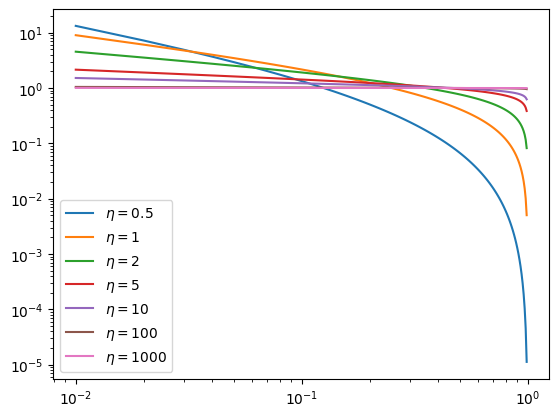

In [9]:
import matplotlib.pyplot as plt 
import numpy as np 

plt.figure('')
omega = np.linspace(0,.99,100)
for eta in [.5,1,2,5,10,100,1000]:
    L = (omega**(-eta/(1+eta)) -1)**(1/eta)
    plt.loglog(omega,L,label='$\eta =$'+str(eta))
plt.legend()
plt.show()

### Cleaned network

In [ ]:
hub.get_Network(params=True,
auxilliary=True,
filters=('mu','productivity','nu','g','Ir','Cr','c','d','Dh','p','ROC','pi','omega','gammai','inflation','l'))

## Mining + increased efficiency

NameError: name 'tmax' is not defined

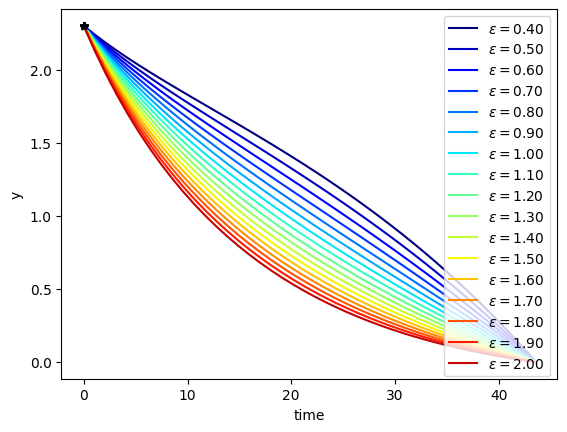

In [10]:
epsilon =1.4 
g = 0.03 
r0 = 0.1
zeta = .1 
Y0 = 0.1

EPSILON = np.linspace(.4,2,17)
import matplotlib as mpl


plt.figure('')

for i,epsilon in enumerate(EPSILON):
    #tmax = (1/g)*np.log( 1 + g*(1-r0)/(zeta*Y0))
    t=np.linspace(0,105,100)

    nuup = np.exp( g*t*(1-epsilon))
    rt = r0 + (zeta*Y0/g)*(np.exp(g*t)-1)
    y = - nuup*np.log(rt)

    plt.plot(t[rt<1],y[rt<1],color = plt.cm.jet(i/len(EPSILON)),label=f'$\epsilon={epsilon:.2f}$')
    armax = np.argmax(y)
    plt.plot(t[armax],y[armax],'*',c='k')
    #plt.plot(t,rt,c='k')
plt.ylabel('y')
plt.xlabel('time')
plt.legend()
plt.title('$ T_{end}='+f'{tmax:.2f}. g= {g:.3f}, r_0 = {r0:.3f},\zeta = {zeta:.3f}, Y_0 = {Y0:.2f}$')
plt.show()

# Valley of stability

In [ ]:

NPARRALLEL = 100
hub=chm.Hub('GK_divexp',verb=False)
hub.set_preset('test')

### POINTS IN A DOMAIN
BasinDomain = {
    'employment': {'mu': 0.5,
               'sigma': 0.99,
               'type': 'uniform'},
    'omega': {'mu': 0.5,
              'sigma': .98,
              'type': 'uniform'},
    'd': {'mu': -3,
          'sigma': 8,
          'type': 'uniform'},
}
initcond = chm.generate_dic_distribution(BasinDomain,
                                         N=NPARRALLEL)

### TRANSLATE TO K,w,D
R=hub.dparam
#employment = K / (a*nu*N)
#omega = w/(a*p)
#d = D/(p*K/nu) 

K = initcond['employment']*(1*3*1)
w = initcond['omega']*1*1
D = initcond['d']*K*1/3
hub.set_dparam(**{'K':K,
                  'w':w,
                  'D':D,
                  'nx':NPARRALLEL
                  },verb=False)

#hub.get_summary()
hub.run()

hub.reinterpolate_dparam(N=1000)

#R=hub.dparam
#print(R['employment']['value'][-10:,0,0,0,0]) #0.07703
#print(R['omega']['value'][-10:,0,0,0,0]) #0.8450464
#print(R['d']['value'][-10:,0,0,0,0]) #-0.07703629

finalpoint = {
    'employment': 0.92298215,
    'omega': 0.84504247,
    'd': -0.0760692,
}
hub.calculate_ConvergeRate(finalpoint)
chm.plots.convergence(hub,finalpoint,showtrajectory=True)



## <a id='toc2_9_'></a>[SHOCKS](#toc0_)

In the middle of a run, we modify either a parameter or a differential variable, then we look where it goes

In [ ]:
### FIRST RUN
hub=chm.Hub('GK_divexp',preset='test')
hub.set_dparam(**{'Tmax':50})
hub.run()
#hub.plot()
### WE EXTRACT THE NEW STATE OF THE SYSTEM 
newpreset=hub.Extract_preset(t=50)
#for k,v in newpreset.items():print(k,v)

### WE PUT IT INTO A NEW HUB 
hubnext=chm.Hub('GK_divexp')
hubnext.set_dparam(**newpreset)
hubnext.set_dparam(**{'K':20,})
hubnext.run()
#hubnext.plot()

# GET DATA TOGETHER 
R2 = hubnext.dparam
R1 = hub.dparam
T =np.concatenate((R1['time'      ]['value'][:,0,0,0,0],R2['time'      ]['value'][:,0,0,0,0]+50))
E =np.concatenate((R1['employment']['value'][:,0,0,0,0],R2['employment']['value'][:,0,0,0,0]))

import matplotlib.pyplot as plt
plt.figure()
plt.plot(T,E)
plt.plot([50,50],[.7,1],ls='--',c='k')
plt.show()


# Utility-Maximising Consumption

## The system 
Let be $$U = \sum_i f_i(H_i)$$ Utility from possessions. 
The total wealth of such possession $$W= p_i H_i$$
This allows the effective consumption $$C^{eff}_i = (\delta_{i} I + \rho_{ij})) H_j$$ , inducing a sustaining flow $$F = \sum_i p_iC^{eff}_i$$
We suppose an income flux $$F^{in}$$. In consequence $$\dot{W}= F^{in} - F= \sum_i p_i \dot{H_i}$$.

The question is : how $\{ H_i \}$ evolves in order to maximise utility ? 

## Optimization 

$$\dfrac{\partial U}{\partial H_i}= f_i'(H_i)$$

We want $\forall i , \dfrac{\partial \frac{U}{W}}{\partial H_i} = 0$ 

$$ U'W  =- W'U $$

$$ f_i'(H_i) \sum_j p_j H_j + p_i \sum_j f_j(H_j) = 0$$ 

Let's consider : 

$$f_i(H_i)= U_i (1- e^{-\beta_i H_i})$$

In consequence : 

$$f_i(H_i)' = \beta_i U_i(-    e^{-\beta_i H_i}) + \beta_i U_i - \beta_i U_i =  \beta_i [ U_i(1-    e^{-\beta_i H_i}) -  U_i ] = \beta_i (  f_i(H_i) - U_i )$$

-------------------

$$ \beta (  f_i(H_i) - U_i ) W + p_i \sum_j f_j(H_j) = 0$$

$$   \sum_j U_j \left(\dfrac{1- e^{-\beta_j H_j}}{ e^{-\beta_i H_i}}\right)  =   \dfrac{W \beta_i U_i}{p_i}   $$ 

Let $$ Z =  \sum_j U_j \left(1- e^{-\beta_j H_j} \right)$$

$$Z/W = \beta_i U_i p_i e^{-\beta H_i}$$ 

$$\log(Z/W) = log(\beta_i U_i p_i) - \beta H_i$$

$$H_i\beta_i = \log(\beta_i U_i p_i) - \log(Z/W)$$

$$Z = \sum_i U_i ( 1 - \dfrac{\beta_i U_i p_i W}{Z} )$$

$$ Z = \sum_i U_i ( 1 * )

Utility $$U = \sum_i f_i(H_i) = \sum_i U_i \left(1- e^{-\beta_i H_i}\right)$$

$$U' = \beta_i U_i(   e^{-\beta_i H_i})$$

Wealth $$W= p_i H_i$$

We want $\forall i , \dfrac{\partial \frac{U}{W}}{\partial H_i} = 0$ 

$$W'=p_i$$

$$ U'W  =- W'U $$

$$ \dfrac{U'}{U} = - \dfrac{W'}{W}  $$

$$ \sum_j  \left(\dfrac{p_i}{  p_j } \dfrac{1}{\beta_i} \dfrac{ U_j}{U_i } \dfrac{\left(1- e^{-\beta_j H_j}\right)}{     e^{-\beta_i H_i}} +  H_j\right) = 0$$

# Dynamic version

Total income 

$$W = W_i + W_{sus}$$ 

Sustainability income :

$$W_{sus} =p_i (\delta_{ii} + \rho_{ij}) H_j$$

marginal utility per money :

$$u_i = \dfrac{1}{p_i} \dfrac{\partial U}{\partial H_i}= \dfrac{U_i\beta}{p_i} e^{-\beta_i H_i} $$

New units bought :

$$C_i = \dfrac{W (1 + \dot{d_h})}{p_i} \dfrac{e^{Z u_i}}{\sum e^{Z u_i}}$$ 

-------------------------------------------

$$\dot{H_i} = C_i$$ 

$$W^{inv} = W - \sum_j p_i (\delta_{ii} + \rho_{ij}) H_j$$

$$u_i = \dfrac{1}{p_i} \dfrac{\partial U}{\partial H_i}= \dfrac{U_i\beta}{p_i} e^{-\beta_i H_i} $$

$$ C_i = \dfrac{W^{inv} (1 + \dot{d_h})}{p_i} \dfrac{e^{Z u_i}}{\sum e^{Z u_i}}$$


In [ ]:
t = np.linspace(0,100,num=101)
dt = t[1]-t[0]

beta = np.array([1,1,0.1]) # Saturation
p    = np.array([1,2,3]) # Price Good
U    = np.array([1,10,2]) # Utility scaling 
delta = np.array([0.1,0.1,0.1])
rho = np.array([ [0.1 ,0.01,0.01], 
        [0.01,0.1 ,0.01], 
        [0.01,0.01,0.1 ]])
g = 0#0.05 # growth rate of wage  
Z=1 # Utility precision



W     = 1*np.exp(g*t)
Winv  = np.zeros_like(W)
H     = np.zeros((len(t),3)) # original possessions 
u     = np.zeros((len(t),3)) 
weight= np.zeros((len(t),3)) 
C     = np.zeros((len(t),3)) 


for i in range(len(t)-1):
    #print(i)
    u[i,:]      =  U*beta/p  * np.exp(-beta*H[i,:])
    weight[i,:] = np.exp(Z*u[i,:])/sum([np.exp(Z*u[i,j])         for j in range(3)])
    Winv[i] = W[i]- sum([p[j]*delta[j]*H[i,j] for j in range(3)]) 
    C[i,:]     = Winv[i]/p *weight[i,:]                   
    H[i+1,:]= H[i,:] + C[i,:]*dt

import matplotlib.pyplot as plt
fig=plt.figure()
ax1=plt.subplot(511);ax1.set_xticks([]);ax1.set_ylabel('relative utility')
ax2=plt.subplot(512);ax2.set_xticks([]);ax2.set_ylabel('weight')
ax3=plt.subplot(513);ax3.set_xticks([]);ax3.set_ylabel('consumption')
ax4=plt.subplot(514);ax4.set_xticks([]);ax4.set_ylabel('possessions')
ax5=plt.subplot(515);ax5.set_ylabel('income')

for j in range(3):
    ax1.plot(t[:-1],u[:-1,j]     ,label=f'relative use {j}')    
    ax2.plot(t[:-1],weight[:-1,j],label=f'weight {j}')    
    ax3.plot(t[:-1],C[:-1,j],label=f'consumption {j}')    
    ax4.plot(t,H[:,j],label=f'possession {j}')  
ax5.plot(t[:-1],W[:-1]   ,label='Wage')
ax5.plot(t[:-1],Winv[:-1],label='Investing wage')
ax5.legend()
#plt.legend()
fig.tight_layout()

plt.subplots_adjust(wspace=0.01, hspace=0)
plt.show()